# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weatherpy_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500) 
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_names = []
countries = []
lat_ls = []
lng_ls = []
temp_ls = []
humidity_ls = []
cloudiness_ls = []
wind_speeds = []
dates = []

In [4]:
# Loop through cities from random select

print("Beginning data retrieval:\n-------------------------------------------")
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()

#     print(json.dumps(response_json, indent = 4, sort_keys = True))
#     break  
    
    try:
        
        city_name = response_json["name"]
        city_names.append(city_name)
        
        country = response_json["sys"]["country"]
        countries.append(country)
        
        lat = response_json["coord"]["lat"]
        lat_ls.append(lat)
        
        lng = response_json["coord"]["lon"]
        lng_ls.append(lng)
        
        temp = response_json["main"]["temp_max"]
        temp_ls.append(temp)
        
        humidity = response_json["main"]["humidity"]
        humidity_ls.append(humidity)
        
        cloudiness = response_json["clouds"]["all"]
        cloudiness_ls.append(cloudiness)
        
        wind_speed = response_json["wind"]["speed"]
        wind_speeds.append(wind_speed)
        
        date_timestamp = response_json["dt"]
        # Converting Date format
        converted_timestamp = datetime.utcfromtimestamp(date_timestamp)
        date = datetime.date(converted_timestamp)
        dates.append(date)
        
        print(f"Retrieving {city_name}, {country}...success!")
        
    except (KeyError, IndexError):
        print(f"No {city_name}, {country} record exists.")
print(f"-------------------------------------------\nTotal of {len(cities)} data retrievals complete.")

Beginning data retrieval:
-------------------------------------------
Retrieving Kariba, ZW...success!
No Kariba, ZW record exists.
Retrieving Puro, PH...success!
Retrieving Mizdah, LY...success!
Retrieving Dicabisagan, PH...success!
Retrieving Ponta do Sol, PT...success!
Retrieving Cherskiy, RU...success!
Retrieving Santa Marta, CO...success!
Retrieving Avarua, CK...success!
Retrieving George Town, MY...success!
Retrieving Punta Arenas, CL...success!
Retrieving Albany, US...success!
No Albany, US record exists.
Retrieving Pangnirtung, CA...success!
Retrieving Bay Roberts, CA...success!
Retrieving Yellowknife, CA...success!
Retrieving Kapaa, US...success!
Retrieving Torbay, CA...success!
Retrieving Port-de-Bouc, FR...success!
Retrieving Huarmey, PE...success!
Retrieving Iqaluit, CA...success!
Retrieving Chui, UY...success!
Retrieving Forsytheganj, BY...success!
Retrieving Montepuez, MZ...success!
No Montepuez, MZ record exists.
Retrieving Mount Isa, AU...success!
Retrieving Mergen, CN.

Retrieving Arraial do Cabo, BR...success!
Retrieving Havre-St-Pierre, CA...success!
Retrieving Marrakesh, MA...success!
Retrieving Laguna, US...success!
Retrieving Shingū, JP...success!
Retrieving Souillac, MU...success!
Retrieving Piazza Armerina, IT...success!
Retrieving Kismayo, SO...success!
Retrieving Cidreira, BR...success!
Retrieving Tayginka, RU...success!
Retrieving Broome, US...success!
Retrieving Kumluca, TR...success!
Retrieving Vila Franca do Campo, PT...success!
Retrieving Chara, RU...success!
Retrieving Pedasí, PA...success!
Retrieving Hirara, JP...success!
Retrieving Riyadh, SA...success!
Retrieving Guilin, CN...success!
Retrieving Ilulissat, GL...success!
Retrieving Vilhena, BR...success!
Retrieving São João da Barra, BR...success!
Retrieving Provideniya, RU...success!
Retrieving Mar del Plata, AR...success!
Retrieving Arrecife, ES...success!
Retrieving Pithora, IN...success!
Retrieving Kananga, CD...success!
Retrieving Rudnya, RU...success!
Retrieving Zeya, RU...succe

Retrieving Najrān, SA...success!
Retrieving Praia, CV...success!
Retrieving Belomorsk, RU...success!
Retrieving Champerico, GT...success!
Retrieving Maralal, KE...success!
Retrieving Tazovsky, RU...success!
Retrieving Teeli, RU...success!
Retrieving São Gabriel, BR...success!
Retrieving Uíge, AO...success!
No Uíge, AO record exists.
Retrieving Plettenberg Bay, ZA...success!
Retrieving Şebinkarahisar, TR...success!
Retrieving Ayagoz, KZ...success!
Retrieving Asău, RO...success!
Retrieving Pacific Grove, US...success!
Retrieving Rypefjord, NO...success!
Retrieving Conneaut, US...success!
Retrieving Adrar, MR...success!
Retrieving Rondonópolis, BR...success!
Retrieving Gizo Government Station, SB...success!
Retrieving Noyabrsk, RU...success!
No Noyabrsk, RU record exists.
Retrieving Yangi Marg`ilon, UZ...success!
Retrieving Tombouctou, ML...success!
Retrieving Leshukonskoye, RU...success!
Retrieving Hutchinson, US...success!
No Hutchinson, US record exists.
Retrieving Maragogi, BR...succe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Display the DataFrame
cities_df = pd.DataFrame({"City": city_names, "Country": countries, "Latitude": lat_ls, \
                          "Longitude": lng_ls, "Max Temperature (F)": temp_ls, "Humidity (%)": humidity_ls, \
                          "Cloudiness (%)": cloudiness_ls, "Wind Speed (mph)": wind_speeds, "Date": date})

cities_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,Kariba,ZW,-16.5167,28.8000,84.11,44,52,17.38,2021-10-18
1,Puro,PH,12.4841,123.3827,79.97,87,62,6.89,2021-10-18
2,Mizdah,LY,31.4451,12.9801,69.91,48,100,15.14,2021-10-18
3,Dicabisagan,PH,17.0818,122.4157,77.90,87,71,3.94,2021-10-18
4,Ponta do Sol,PT,32.6667,-17.1000,79.12,34,0,2.86,2021-10-18


In [6]:
cities_df.describe()

,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,21.193370,18.964176,61.266766,69.767483,58.793706,8.697098
std,33.476439,90.536526,20.895372,21.471362,37.660797,5.999291
min,-54.800000,-175.200000,-14.980000,7.000000,0.000000,0.000000
25%,-7.634925,-60.584700,46.627500,58.750000,20.000000,4.112500
50%,26.965000,24.607350,66.200000,74.000000,74.000000,7.605000
75%,48.920800,95.458325,77.775000,86.000000,95.000000,11.595000
max,78.218600,179.316700,100.760000,100.000000,100.000000,39.120000


In [7]:
# Export the city data into a .csv

cities_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
cities_df.loc[cities_df["Humidity (%)"]>100]

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date


In [9]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = cities_df.loc[cities_df["Humidity (%)"] > 100].index
high_humidity

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_df = cities_df.drop(high_humidity, inplace = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [30]:
# set up x, y for scatter plots
x_lat = clean_city_df["Latitude"]
y_temp = clean_city_df["Max Temperature (F)"]
y_humid = clean_city_df["Humidity (%)"]
y_cloud = clean_city_df["Cloudiness (%)"]
y_wind = clean_city_df["Wind Speed (mph)"]

## Latitude vs. Temperature Plot

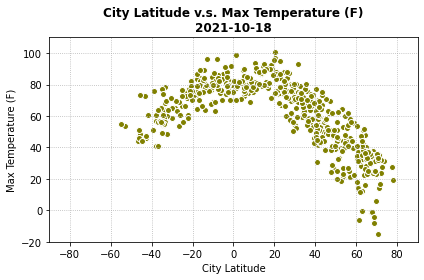

In [35]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_temp, marker = "o", color = "olive", edgecolor = "white")

plt.title(f"City Latitude v.s. Max Temperature (F)\n{date}", fontweight = "bold")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-90, 90)
plt.ylim(-20, 110)
plt.grid(linestyle = ":")

plt.tight_layout()

plt.savefig("image/Lat_vs_Temp")
plt.show()

## Latitude vs. Humidity Plot

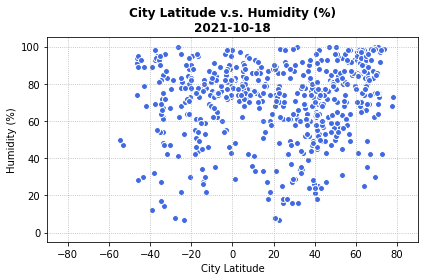

In [32]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_humid, marker = "o", color = "royalblue", edgecolor = "white")

plt.title(f"City Latitude v.s. Humidity (%)\n{date}", fontweight = "bold")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.ylim(-5, 105)
plt.grid(linestyle = ":")

plt.tight_layout()

plt.savefig("image/Lat_vs_Humid")
plt.show()

## Latitude vs. Cloudiness Plot

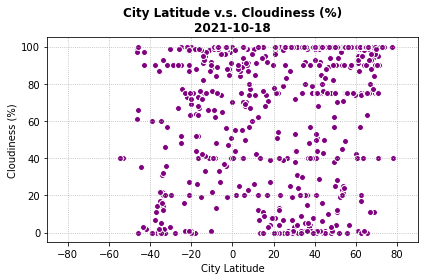

In [33]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_cloud, marker = "o", color = "purple", edgecolor = "white")

plt.title(f"City Latitude v.s. Cloudiness (%)\n{date}", fontweight = "bold")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 90)
plt.ylim(-5, 105)
plt.grid(linestyle = ":")

plt.tight_layout()

plt.savefig("image/Lat_vs_Cloud")
plt.show()

## Latitude vs. Wind Speed Plot

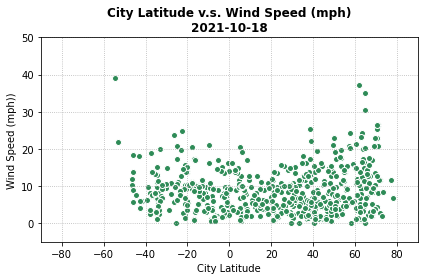

In [34]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_wind, marker = "o", color = "seagreen", edgecolor = "white")

plt.title(f"City Latitude v.s. Wind Speed (mph)\n{date}", fontweight = "bold")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph))")
plt.xlim(-90, 90)
plt.ylim(-5, 50)
plt.grid(linestyle = ":")

plt.tight_layout()

plt.savefig("image/Lat_vs_Wind")
plt.show()

## Linear Regression

In [16]:
n_hemisphere_df = clean_city_df.loc[clean_city_df["Latitude"] >= 0]
s_hemisphere_df = clean_city_df.loc[clean_city_df["Latitude"] < 0]
s_hemisphere_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,Kariba,ZW,-16.5167,28.8000,84.11,44,52,17.38,2021-10-18
7,Avarua,CK,-21.2078,-159.7750,73.45,88,90,2.30,2021-10-18
9,Punta Arenas,CL,-53.1500,-70.9167,53.71,47,40,21.85,2021-10-18
17,Huarmey,PE,-10.0681,-78.1522,69.22,74,89,10.18,2021-10-18
19,Chui,UY,-33.6971,-53.4616,68.22,48,22,2.55,2021-10-18


In [17]:
# set a function to create Linear Regression plots

def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = round(rvalue**2,2)

    plt.scatter(x, y, marker = "o", color = color, edgecolor = "white")
    plt.plot(x,regress_values,"r-")
    
    # add the linear regression equation and line
    plt.annotate(line_eq, position, fontsize = 15, color = "red", fontweight = "bold")
    plt.title(f"{title}\n{date}", fontweight = "bold")
    plt.xlabel("City Latitude")
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
        
    plt.savefig(f"image/{figname}.png")
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8619755893668406


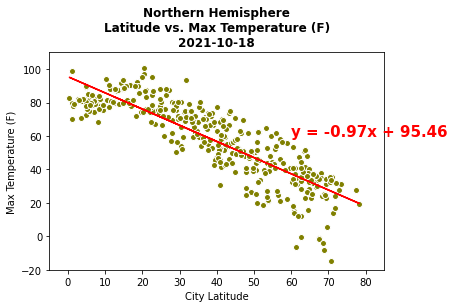

None


In [18]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Max Temperature (F)"]
y_label = "Max Temperature (F)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "olive"
position = (60, 60)

plt.xlim(-5, 85)
plt.ylim(-20, 110)
figname = "linreg_N_Temp"

print(linregress_plot(x,y))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7747672677621017


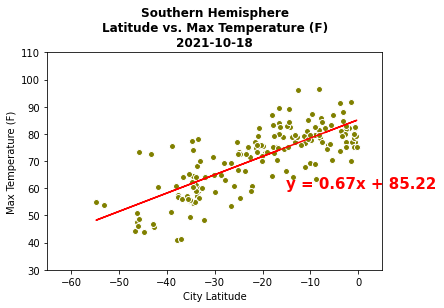

None


In [19]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Max Temperature (F)"]
y_label = "Max Temperature (F)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "olive"
position = (-15, 60)

plt.xlim(-65, 5)
plt.ylim(30, 110)
figname = "linreg_S_Temp"

print(linregress_plot(x,y))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20373865159272733


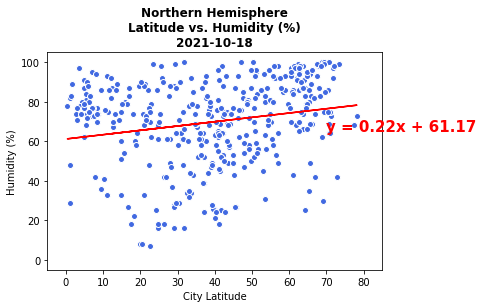

None


In [20]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Humidity (%)"]
y_label = "Humidity (%)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "royalblue"
position = (70, 65)

plt.xlim(-5, 85)
plt.ylim(-5, 105)
figname = "linreg_N_Humid"

print(linregress_plot(x,y))


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11074474205847455


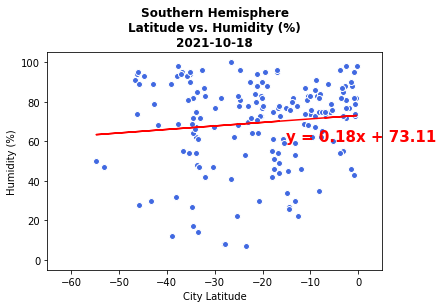

None


In [21]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Humidity (%)"]
y_label = "Humidity (%)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "royalblue"
position = (-15, 60)

plt.xlim(-65, 5)
plt.ylim(-5, 105)
figname = "linreg_S_Humid"

print(linregress_plot(x,y))


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1742073652076872


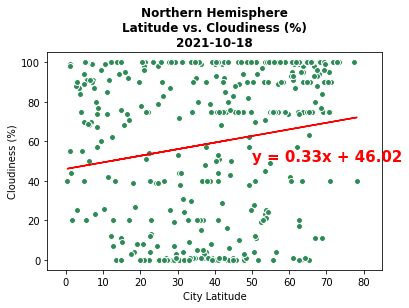

None


In [22]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Cloudiness (%)"]
y_label = "Cloudiness (%)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "seagreen"
position = (50, 50)

plt.xlim(-5, 85)
plt.ylim(-5, 105)
figname = "linreg_N_Cloud"

print(linregress_plot(x,y))


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.41674266805263493


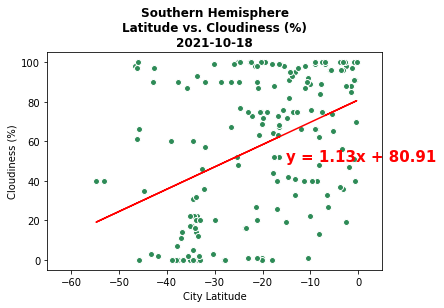

None


In [23]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Cloudiness (%)"]
y_label = "Cloudiness (%)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "seagreen"
position = (-15, 50)

plt.xlim(-65, 5)
plt.ylim(-5, 105)
figname = "linreg_S_Cloud"

print(linregress_plot(x,y))


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2460126955911385


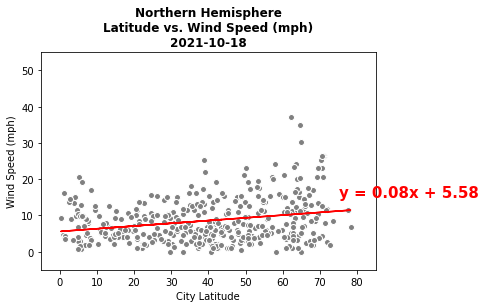

None


In [24]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Wind Speed (mph)"]
y_label = "Wind Speed (mph)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "gray"
position = (75, 15)

plt.xlim(-5, 85)
plt.ylim(-5, 55)
figname = "linreg_N_Wind"

print(linregress_plot(x,y))


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.21106803400450735


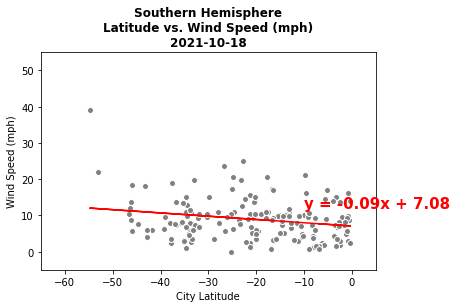

None


In [25]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Wind Speed (mph)"]
y_label = "Wind Speed (mph)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "gray"
position = (-10, 12)

plt.xlim(-65, 5)
plt.ylim(-5, 55)
figname = "linreg_S_Wind"

print(linregress_plot(x,y))
